In [2]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os
from ultralytics import YOLO

In [2]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip("C:\ckt\circuits.v1i.yolov8v2.zip")

Extracted all


In [3]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [4]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [5]:
#Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    all_images.extend(glob.glob(image_paths+'/*.bmp'))
    
    all_images.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

In [6]:
import os

# Directory containing the images
image_dir = r"C:\ckt\circuits.v1i.yolov8v2\train\images"

# Get a list of all image files in the directory
all_images = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Directory containing the label files
label_dir = r"C:\ckt\circuits.v1i.yolov8v2\train\labels"

# Iterate through images and labels
for image_path in all_images:
    # Extract the image name without extension
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    
    # Construct the path to the corresponding label file
    label_path = os.path.join(label_dir, f"{image_name}.txt")
    
    # Check if the label file exists
    if os.path.exists(label_path):
        # Open the label file and read the contents
        with open(label_path, 'r') as f:
            label_data = f.read()
        
        # Process the label data as needed
        print(f"Label data for {image_path}: {label_data}")
    else:
        print(f"No label file found for {image_path}")


Label data for C:\ckt\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231221_png.rf.892eb0b39da3410396bfe210a7afa588.jpg: 14 0.571875 0.190625 0.225 0.1015625
12 0.5015625 0.45546875 0.284375 0.20625
4 0.51640625 0.7734375 0.1234375 0.2484375
Label data for C:\ckt\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231221_png.rf.caa5388020a7dfce445416a81a6a627e.jpg: 14 0.190625 0.428125 0.1015625 0.22421875
12 0.45546875 0.4984375 0.20546875 0.284375
4 0.7734375 0.48359375 0.2484375 0.1234375
Label data for C:\ckt\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231229_png.rf.6fbc200024db7f2ac21376784386e50d.jpg: 7 0.1234375 0.51640625 0.2078125 0.37109375
4 0.41640625 0.21796875 0.08984375 0.2484375
14 0.63359375 0.2 0.165625 0.2015625
Label data for C:\ckt\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231229_png.rf.dbb1a77803a430e9d6934e8f4a564bef.jpg: 7 0.51640625 0.8765625 0.371875 0.2078125
4 0.21796875 0.58359375 0.2484375 0.090625
14 0.2 0.366406

Label data for Screenshot-2024-02-11-000910_png.rf.763ec77b5cbba752c4ab3b4965e75a4b.jpg: ['3', '0.49921875', '0.22265625', '0.346875', '0.321875', '9', '0.51171875', '0.515625', '0.2671875', '0.246875', '4', '0.34921875', '0.78125', '0.125', '0.240625']
Label data for Screenshot-2024-02-10-232427_png.rf.e99cdf597e16cda8a53533fdf33c774c.jpg: ['12', '0.75546875', '0.53359375', '0.275', '0.35', '14', '0.43515625', '0.509375', '0.11875', '0.20625', '14', '0.228125', '0.51015625', '0.1125', '0.1875']
Label data for Screenshot-2024-02-10-233436_png.rf.bc17cdc4ed4ecd82f9b0e7b694468d3f.jpg: ['7', '0.50234375', '0.26796875', '0.3234375', '0.32109375', '14', '0.13125', '0.565625', '0.09296875', '0.21015625', '14', '0.78203125', '0.49296875', '0.10234375', '0.23359375']
Label data for Screenshot-2024-02-10-233359_png.rf.ae24852ef9b3c0031f585749427757f1.jpg: ['14', '0.8375', '0.465625', '0.153125', '0.146875', '14', '0.53828125', '0.44921875', '0.15625', '0.153125', '14', '0.215625', '0.48203125',

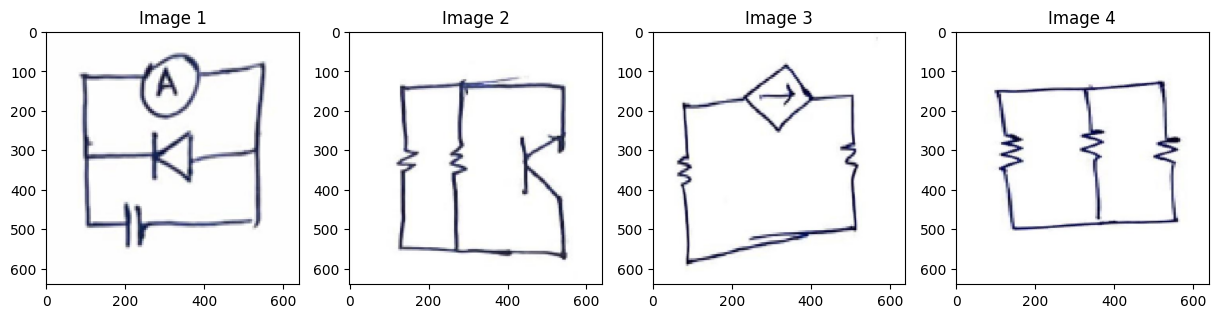

In [7]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def plot(image_paths, label_dir, num_samples):
    # Load the list of image paths
    all_images = os.listdir(image_paths)
    
    # Shuffle the list of image paths
    random.shuffle(all_images)
    
    # Visualize a few training images
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0, len(all_images)-1)
        image_name = all_images[j]
        image_path = os.path.join(image_paths, image_name)
        
        # Read and display the image
        image = cv2.imread(image_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i+1}")
        
        # Load the corresponding label data from the .txt file
        label_file_path = os.path.join(label_dir, image_name[:-4] + '.txt')
        with open(label_file_path, 'r') as f:
            label_data = f.read().strip().split()  # Read label data from the file
            print(f"Label data for {image_name}: {label_data}")
            # Process the label data as needed
        
    plt.show()

# Example usage
plot(
    image_paths=r"C:\ckt\circuits.v1i.yolov8v2\train\images", 
    label_dir=r"C:\ckt\circuits.v1i.yolov8v2\train\labels",
    num_samples=4,
)


In [8]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:11<00:00, 11.7MB/s] 


In [9]:
# import os
# import yaml

# def folder_to_yaml(folder_path):
#     # Initialize an empty dictionary to store folder contents
#     folder_contents = {'folder': folder_path, 'contents': []}

#     # Iterate through the contents of the folder
#     for item in os.listdir(folder_path):
#         item_path = os.path.join(folder_path, item)
#         item_info = {'name': item}

#         # Check if item is a file
#         if os.path.isfile(item_path):
#             item_info['type'] = 'file'
#             item_info['size'] = os.path.getsize(item_path)
#             item_info['modified'] = os.path.getmtime(item_path)

#         # Check if item is a subfolder
#         elif os.path.isdir(item_path):
#             item_info['type'] = 'folder'
#             # Recursively call the function for subfolders
#             item_info['contents'] = folder_to_yaml(item_path)['contents']

#         folder_contents['contents'].append(item_info)

#     return folder_contents

# # Define the path to the folder you want to convert to YAML
# folder_path = "E:\\Research\\circuit.v1i.yolov8\\train\\images"

# # Convert the folder to YAML
# yaml_data = folder_to_yaml(folder_path)

# # Write the YAML data to a file
# output_file = 'E:\\Research\\circuitdataset\\componentdataset.yaml'
# with open(output_file, 'w') as yaml_file:
#     yaml.dump(yaml_data, yaml_file)

# print("Folder contents converted and saved to YAML file:", output_file)


In [9]:
results = model.train(data=r"C:\ckt\circuits.v1i.yolov8v2\data.yaml", epochs=20)

Ultralytics YOLOv8.1.18 🚀 Python-3.11.6 torch-2.2.1+cpu CPU (AMD Ryzen 9 7950X 16-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=C:\ckt\circuits.v1i.yolov8v2\data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 9.32MB/s]

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning C:\ckt\train\labels... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<00:00, 1221.45it/s]


train: New cache created: C:\ckt\train\labels.cache


val: Scanning C:\ckt\valid\labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 1263.82it/s]

val: New cache created: C:\ckt\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.848      3.393      1.871         16        640: 100%|██████████| 21/21 [07:14<00:00, 20.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all         46        130      0.336       0.37      0.289      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.549      1.973      1.617         20        640: 100%|██████████| 21/21 [06:39<00:00, 19.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.22s/it]

                   all         46        130      0.661       0.56       0.56      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.492      1.599      1.541         31        640: 100%|██████████| 21/21 [06:31<00:00, 18.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.77s/it]

                   all         46        130      0.381       0.67      0.451      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.523      1.503      1.548         17        640: 100%|██████████| 21/21 [06:23<00:00, 18.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.94s/it]

                   all         46        130      0.323      0.762      0.548      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.478      1.452       1.58         14        640: 100%|██████████| 21/21 [06:26<00:00, 18.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.62s/it]

                   all         46        130      0.607      0.591      0.548      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.557      1.444      1.599         16        640: 100%|██████████| 21/21 [06:23<00:00, 18.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.68s/it]

                   all         46        130      0.559      0.687      0.603      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.497      1.324      1.559         19        640: 100%|██████████| 21/21 [06:24<00:00, 18.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.50s/it]

                   all         46        130      0.412      0.728        0.6      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.509      1.308      1.584         24        640: 100%|██████████| 21/21 [06:20<00:00, 18.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.63s/it]

                   all         46        130      0.515      0.715      0.604      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.462      1.259      1.551         13        640: 100%|██████████| 21/21 [06:23<00:00, 18.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.63s/it]

                   all         46        130      0.662      0.719      0.755      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.437      1.112      1.487         24        640: 100%|██████████| 21/21 [06:16<00:00, 17.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.63s/it]

                   all         46        130      0.603      0.663      0.718       0.45


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.365     0.8932      1.588         12        640: 100%|██████████| 21/21 [06:48<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.99s/it]

                   all         46        130      0.643      0.822      0.755       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.359     0.8485        1.6         10        640: 100%|██████████| 21/21 [06:33<00:00, 18.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all         46        130      0.858      0.691      0.856      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.338     0.8017      1.603         11        640: 100%|██████████| 21/21 [06:16<00:00, 17.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.73s/it]

                   all         46        130      0.788      0.775       0.87      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.334     0.7722      1.577         12        640: 100%|██████████| 21/21 [06:13<00:00, 17.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.58s/it]

                   all         46        130      0.932      0.746      0.918      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.311     0.7265      1.531         11        640: 100%|██████████| 21/21 [06:23<00:00, 18.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.18s/it]

                   all         46        130      0.782      0.841      0.883      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G        1.3     0.6895      1.538         11        640: 100%|██████████| 21/21 [07:13<00:00, 20.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.23s/it]

                   all         46        130      0.824      0.819      0.884       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.262       0.64      1.495         10        640: 100%|██████████| 21/21 [07:13<00:00, 20.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.21s/it]

                   all         46        130      0.879      0.836       0.89      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.224     0.6172      1.477         12        640: 100%|██████████| 21/21 [07:12<00:00, 20.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.16s/it]

                   all         46        130      0.803      0.895      0.906      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.193     0.5924      1.462         12        640: 100%|██████████| 21/21 [07:13<00:00, 20.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.17s/it]

                   all         46        130      0.799      0.904       0.93      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.205     0.5958      1.456         12        640: 100%|██████████| 21/21 [07:12<00:00, 20.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.03s/it]

                   all         46        130      0.792      0.916       0.93      0.617



20 epochs completed in 2.344 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train\weights\best.pt, 136.7MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.11.6 torch-2.2.1+cpu CPU (AMD Ryzen 9 7950X 16-Core Processor)
Model summary (fused): 268 layers, 68138976 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.78s/it]


                   all         46        130      0.799      0.904       0.93      0.618
              P mosfet         46          1       0.68          1      0.995      0.697
             ac source         46          1      0.489          1      0.995      0.597
               ammeter         46          9       0.79      0.889      0.922      0.686
             capacitor         46         23      0.956      0.936      0.988      0.598
        current source         46          2          1          0      0.497      0.398
        dc volt source         46         16      0.849      0.938      0.973       0.63
    dep current source         46         11      0.991          1      0.995      0.776
       dep volt source         46          4      0.714          1      0.845      0.655
                 diode         46         13      0.812          1      0.941      0.697
                   gnd         46          2      0.805          1      0.995      0.698
              inducto

In [5]:
infer = YOLO("yolov8x.pt") 
results = infer.predict(r"C:\Users\tanis\OneDrive\Desktop\circuit\Screenshot 2024-02-10 231246.png", save=True)


image 1/1 C:\Users\tanis\OneDrive\Desktop\circuit\Screenshot 2024-02-10 231246.png: 640x640 (no detections), 2082.6ms
Speed: 6.5ms preprocess, 2082.6ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3
